In [20]:
import tensorflow as tf

tf.VERSION

'1.10.0'

In [21]:
# get our data set
mnist = tf.keras.datasets.mnist # 28x28 images of hand written digits 0-9

# load our data set into training and test variables
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [22]:
# get the shape of our data
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [23]:
# let's see our tensor
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

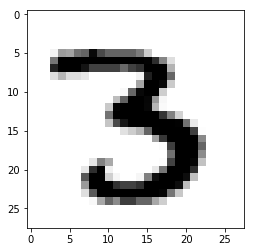

In [24]:
import matplotlib.pyplot as plt
plt.imshow(x_train[12], cmap = plt.cm.binary)
plt.show()

In [6]:
# normalize the data

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_valid = tf.keras.utils.normalize(x_valid, axis=1)

In [7]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

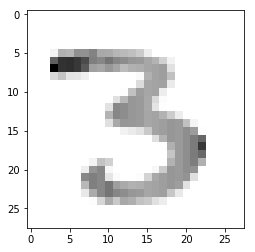

In [14]:
# values scaled between 0 and 1
import matplotlib.pyplot as plt
plt.imshow(x_train[12], cmap = plt.cm.binary)
plt.show()

In [8]:
# build the model

model = tf.keras.models.Sequential()

# define architecture of model
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# parameters for training the model
# NNs are trying to minimize loss not gain accuracy
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 63us/step - loss: 0.2652 - acc: 0.9231
Epoch 2/3
60000/60000 [==============================] - 4s 60us/step - loss: 0.1092 - acc: 0.9658
Epoch 3/3
60000/60000 [==============================] - 4s 60us/step - loss: 0.0734 - acc: 0.9768


In [9]:
# NNs are great at fitting
# but did it overfit?

val_loss, val_acc = model.evaluate(x_valid, y_valid)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 22us/step
0.09185394825246185 0.9713


In [10]:
model.save('mnistTF.model')

In [11]:
!ls

Untitled.ipynb	mnistTF.model


In [13]:
new_model = tf.keras.models.load_model('mnistTF.model')

In [15]:
predictions = new_model.predict([x_valid])

In [16]:
import numpy as np

# get our prediction
print(np.argmax(predictions[0]))

7


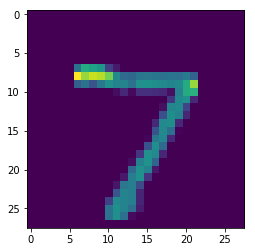

In [18]:
# and lo and behold it was a '7'
plt.imshow(x_valid[0])
plt.show()